Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [180]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

In [181]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

# Reads csv and converts each row to position in a list inside a dictionaty.
# Doubt: Will the column names be repeated for each position of this list?
def read_csv(filename):
    with open(filename, 'rb') as f:
        # each row of the file will be a dic. The keys are the column names:
        reader = unicodecsv.DictReader(f)
        # converts an iterator to a list:
        return list(reader)

enrollments = read_csv('enrollments.csv')
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [182]:
project_submissions = read_csv('project_submissions.csv')
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [183]:
daily_engagement = read_csv('daily_engagement.csv')
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

## Fixing Data Types

In [184]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    #may be empty if student has not cancelled yet:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True' # It will return the boolean true if there is the string true.
    
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [185]:
# Clean up the data types in the engagement table
# If would convert str '0.0' to int would fail, so it converts firstly from str to floating point number and then to int 
# since logically values of column lessons_completed should be integer.
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [186]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

Hese are my 5 questions:

1. What is the average of cancellation requests?
2. What is the day average from join to cancel?
3. Is there any correlation between the daily engagement with successful project submission (on time)?
4. Is there any correlation between test account vs. paid account with daily engagement?
5. Is there any correlation between test account vs. paid account with successful project submission (on time)?

Carolina's questions:
1. How long to submit projects?
2. How do students who pass their projects differ from those who don't? (FOCUS)
3. How much time students spend taking classes?
4. How time spent relates to lessons / projects completed?
5. How engagement changes?
6. How many times students submit?

In [187]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
num_rows_enrollments = len(enrollments)
num_rows_engagement = len(daily_engagement)
num_rows_project = len(project_submissions)

num_rows_enrollments, num_rows_engagement, num_rows_project

(1640, 136240, 3642)

In [188]:
## Find the number of unique students (account keys) in each table.
# It is commented since I created a most generical method below.
''''def number_students (table, col_name):
    unique_students = set()
    for row in table:
        # Adding an element to set
        unique_students.add(row[col_name])
    return len(unique_students)

number_students(enrollments, 'account_key') , number_students(daily_engagement, 'acct') , number_students(project_submissions, 'account_key')
'''

"'def number_students (table, col_name):\n    unique_students = set()\n    for row in table:\n        # Adding an element to set\n        unique_students.add(row[col_name])\n    return len(unique_students)\n\nnumber_students(enrollments, 'account_key') , number_students(daily_engagement, 'acct') , number_students(project_submissions, 'account_key')\n"

## Problems in the Data

In [189]:
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [190]:
daily_engagement[0]['acct']

'0'

In [191]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
# Creates a new column account_key with the existing content of acct and then delete the acct column:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del engagement_record['acct']

In [192]:
daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

In [193]:
def get_unique_students (table):
    unique_students = set()
    for row in table:
        # Adding an element to set
        unique_students.add(row['account_key'])
    return unique_students

engaged_students = get_unique_students(daily_engagement)
len(get_unique_students(enrollments)) , len(engaged_students) , len(get_unique_students(project_submissions))

(1302, 1237, 743)

## Missing Engagement Records

In [194]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrolled_student in enrollments:
    if enrolled_student['account_key'] not in engaged_students:
        print(enrolled_student)
        break
# Result: join_date is the same as cancel_date. So days_to_cancel is 0. This is why this student was not engaged.

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


## Checking for More Problem Records

In [195]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
for enrolled_student in enrollments:
    if enrolled_student['account_key'] not in engaged_students:
        if enrolled_student['days_to_cancel'] != 0:
            print(enrolled_student)
        #break
''' First 2 accounts have status = canceled but days_to_cancel > 0.
Third account is a non-canceled student that does not exist in engagement table.
But all these three accounts are udacity test account (is_udacity', True) which does not guarantee they're engaged accounts.
So should remove them from the future analysis.

Doubt: Why are there repeated account_keys in same table? Because one student may enroll multiple times'''

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


" First 2 accounts have status = canceled but days_to_cancel > 0.\nThird account is a non-canceled student that does not exist in engagement table.\nBut all these three accounts are udacity test account (is_udacity', True) which does not guarantee they're engaged accounts.\nSo should remove them from the future analysis.\n\nDoubt: Why are there repeated account_keys in same table? Because one student may enroll multiple times"

## Tracking Down the Remaining Problems

In [196]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']: # if is_udacity' is True, it is a test account.
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [197]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [198]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [199]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet (days_to_cancel = None) or who remained enrolled for more than 7 days (days_to_cancel > 7). The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        #Because one student may enroll multiple times, it saves the most recent enrollment_date:
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)
#paid_students

995

## Getting Data from First Week

In [200]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
# Should get the most recent enrollment date because a student may enroll once and cancell it and then enroll again.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [201]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
#for each student that is not an Udacity test account:
for engaged_student in non_udacity_engagement:
    account_key = engaged_student['account_key']
    
    # Checks if current student is a paid student:
    if account_key in paid_students:
        engagement_date = engaged_student['utc_date']
        join_date = paid_students[account_key]
        if within_one_week(join_date, engagement_date):
            paid_engagement_in_first_week.append(engagement_date)

len(paid_engagement_in_first_week)

6919

In [202]:
paid_engagement_in_first_week[0]

datetime.datetime(2015, 1, 9, 0, 0)

In [203]:
#Course's solution:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

# In each record (day) ['num_courses_visited'] may be 0 or more. So created a new field called ['has_visited']
#that is 1 if  ['num_courses_visited'] > 0.
sum = 0
for record in paid_engagement:
    if record['num_courses_visited'] > 0:
        record['has_visited'] = 1
    else:
        record['has_visited'] = 0
    if record['account_key'] == '0':
        sum += record['has_visited']
print(sum)
print(paid_engagement[0])

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
         paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

1293
134549
3618
88
OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])


6919

## Exploring Student Engagement

In [204]:
# Merley's code:
# The keys are account keys, and the values are lists of engagement records.
from collections import defaultdict
engagement_by_account = defaultdict(list)
for engagement_by_record in paid_engagement_in_first_week:
    account_key = engagement_by_record['account_key']
    engagement_by_account[account_key].append(engagement_by_record)
    #print(engagement_by_account[account_key])
    #print('------------')

# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_records in engagement_by_account.items():
#    print(engagement_records)
    total_minutes = 0
    for each_record in engagement_records:
        total_minutes += each_record['total_minutes_visited']
        if account_key == '0':
            print(each_record['total_minutes_visited'])
    total_minutes_by_account[account_key] = total_minutes
print('Total minutes for account_key 0:',total_minutes_by_account['0'])

import numpy as np

# Summarize the data about minutes spent in the classroom
# In python3, dict.values returns a dict_values object, which is not a list or tuple. This is the reason I'm coercing it to a list.
total_minutes = list(total_minutes_by_account.values())
print('Total number of students considered:', len(total_minutes_by_account))
print('Sum:', np.sum(total_minutes))
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

11.6793745
37.2848873333
53.6337463333
33.4892696667
64.7796776667
151.617576833
142.395963833
Total minutes for account_key 0: 494.88049616599994
Total number of students considered: 995
Sum: 305174.78512
Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [205]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [206]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

# Instructor's solution:
if False:
    total_minutes_by_account = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total_minutes = 0
        for engagement_record in engagement_for_student:
            total_minutes += engagement_record['total_minutes_visited']
        total_minutes_by_account[account_key] = total_minutes

    print(len(total_minutes_by_account))
    print(total_minutes_by_account['0'])

# My solution:
# Returns a dic where keys are account keys, and the values are numbers (example: total minutes)
def sum_values_of_field(data, field):
    total_by_account = {}
    for account_key, list_of_records in data.items():
        total = 0
        for record in list_of_records:
            total += record[field]
        total_by_account[account_key] = total
    return total_by_account
 
total_minutes_by_account = sum_values_of_field(engagement_by_account, 'total_minutes_visited')
print(len(total_minutes_by_account))
print(total_minutes_by_account['0'])

995
494.88049616599994


In [207]:
import numpy as np

# Summarize the data about minutes spent in the classroom
# In python3, dict.values returns a dict_values object, which is not a list or tuple. This is the reason I'm coercing it to a list.
total_minutes = list(total_minutes_by_account.values())
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [208]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
# It was noticed that the maximum number of minutes spent by any student during the first week (Maximum: 10568.1008673 min)
# was greater than the number of minutes in a week (10080 min). So the problem was the def 'within_one_week'.

# Finds student with max total minutes of engagement
student_with_max_minutes = None
max_min = 0
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_min:
        max_min = total_minutes
        student_with_max_minutes = student
max_min

# Prints each engagement record of above student:
# Observes that there are 110 records but should be max of 7 records since should be the data only about the first week!
# Also there are dates that are far away than 1 week
i = 1
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print('---------------- Day ', i)
        print(engagement_record)
        i += 1


---------------- Day  1
OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
---------------- Day  2
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
---------------- Day  3
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
---------------- Day  4
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163'

## Lessons Completed in First Week

Sum:  1628
Mean: 1.63618090452
Median: 0.0
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


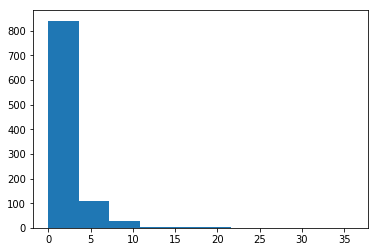

In [209]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

# Returns a dic where keys are account keys, and the values are numbers
def sum_grouped_items(grouped_data, target_value):
    data = {}
    for account_key, nodes in grouped_data.items():
    #    print(nodes)
        total = 0
        for each_node in nodes:
            total += each_node[target_value]
     #       if account_key == '0':
     #           print(each_node[target_value])
        data[account_key] = total
    #print('Total for account_key 0:',data['0'])
    return data

# Checking if gets the same result as before without using this method:
#sum_grouped_items(engagement_by_account, 'data_visited')
# dic: keys are account keys, and the values are total number of lessons completed for such account key:
total_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

import matplotlib.pyplot as plt
def describe_data(data, plot=True):
    print('Sum: ', np.sum(data))
    print('Mean:', np.mean(data))
    print('Median:', np.median(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    if plot:
        plt.hist(data)
    
describe_data(list(total_by_account.values()))

## Number of Visits in First Week

7
Sum:  2853
Mean: 2.86733668342
Median: 3.0
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


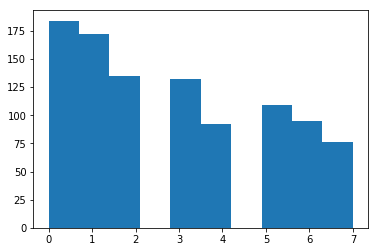

In [210]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

total_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
print(total_visited_by_account['0'])
describe_data(list(total_visited_by_account.values()))

## Splitting out Passing Students

In [211]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

# how many engagement records are in each list:
print (len(passing_engagement))
print (len(non_passing_engagement))

4527
2392


In [212]:
paid_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Comparing the Two Student Groups

In [213]:
print(passing_engagement[0])

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])


In [214]:
######################################
#                 12                 #
######################################

# challenge 1: Se eu rodo essa célula, um histograma vai ser impresso em cima do outro. :(
# Como eu faço para imprimir todos os histogramas de uma maneira ordenada?
# Eu tentei colocar esse dado num dataframe mas nao funcionou.

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
# If added the line plt.show() at the bottom will show the plot in a new window.
grouped_passing_by_account = group_data(passing_engagement, 'account_key')
grouped_non_passing_by_account = group_data(non_passing_engagement, 'account_key')

passing_lists_of_values_by_metric = []
non_passing_lists_of_values_by_metric = []
metrics = ['num_courses_visited', 'total_minutes_visited', 'lessons_completed', 'projects_completed', 'has_visited']

for metric in metrics:
    print("Summary of students who did pass vs. did NOT pass considering %s, respectively:" % metric)
    #Summarize the data about minutes spent in the classroom:
    total_minutes_passing_by_account = sum_grouped_items(grouped_passing_by_account, metric)
    total_minutes_passing = list(total_minutes_passing_by_account.values())
    describe_data(total_minutes_passing, False)
    passing_lists_of_values_by_metric.append(list(total_minutes_passing))
    print('\n')
    
    total_minutes_non_passing_by_account = sum_grouped_items(grouped_non_passing_by_account, metric)
    total_minutes_non_passing = list(total_minutes_non_passing_by_account.values())
    describe_data(total_minutes_non_passing, False)
    non_passing_lists_of_values_by_metric.append(total_minutes_non_passing)
    print("---------------------------------------------------\n")
    
print('The most interesting metric result is about the minutes spent in the classroom (total_minutes_visited) \
because of most difference between passing and non-passing students is the number of hours spent in classroom in the first week \
(passing spent around 6h30min and non-passing spent around 2h30min)')
print('And the least interesting metric result is about the days each student visits the classroom during the first week (has_visited) \
because the minimun and max number of days is the same for passing and non-passing students (0 or 7 days in a week).')

Summary of students who did pass vs. did NOT pass considering num_courses_visited, respectively:
Sum:  3058
Mean: 4.72642967543
Median: 5.0
Standard deviation: 3.7002397793
Minimum: 0
Maximum: 25


Sum:  901
Mean: 2.58908045977
Median: 2.0
Standard deviation: 2.90670969025
Minimum: 0
Maximum: 18
---------------------------------------------------

Summary of students who did pass vs. did NOT pass considering total_minutes_visited, respectively:
Sum:  255297.172075
Mean: 394.586046484
Median: 264.528727667
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


Sum:  49877.6130448
Mean: 143.326474267
Median: 40.3652001666
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
---------------------------------------------------

Summary of students who did pass vs. did NOT pass considering lessons_completed, respectively:
Sum:  1328
Mean: 2.05255023184
Median: 1.0
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


Sum:  300
Mean: 0.862068965517
Media

#Course's solution:
passing_engagement_by_account = group_data(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                               'account_key')

print('non-passing students:')
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(list(non_passing_minutes.values()))

print('passing students:')
passing_minutes = sum_grouped_items(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(list(passing_minutes.values()))

print('non-passing students:')
non_passing_lessons = sum_grouped_items(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(list(non_passing_lessons.values()))

print('passing students:')
passing_lessons = sum_grouped_items(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(list(passing_lessons.values()))

print('non-passing students:')
non_passing_visits = sum_grouped_items(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(list(non_passing_visits.values()))

print('passing students:')
passing_visits = sum_grouped_items(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(list(passing_visits.values()))

Summary of students who did pass vs. did NOT pass considering has_visited, respectively:
Sum:  2190
Mean: 3.38485316847
Median: 3.0
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


Sum:  663
Mean: 1.90517241379
Median: 1.0
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
---------------------------------------------------



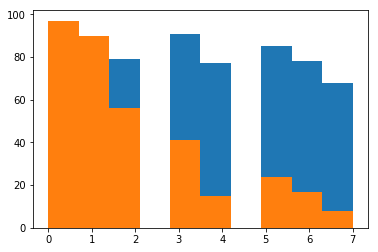

In [216]:
passing_lists_of_values_by_metric = []
non_passing_lists_of_values_by_metric = []
#metrics = ['num_courses_visited', 'total_minutes_visited', 'lessons_completed', 'projects_completed', 'has_visited']
metrics = ['num_courses_visited']

print("Summary of students who did pass vs. did NOT pass considering %s, respectively:" % metric)
#Summarize the data about minutes spent in the classroom:
total_minutes_passing_by_account = sum_grouped_items(grouped_passing_by_account, metric)
total_minutes_passing = list(total_minutes_passing_by_account.values())
describe_data(total_minutes_passing)
passing_lists_of_values_by_metric.append(list(total_minutes_passing))
print('\n')

total_minutes_non_passing_by_account = sum_grouped_items(grouped_non_passing_by_account, metric)
total_minutes_non_passing = list(total_minutes_non_passing_by_account.values())
describe_data(total_minutes_non_passing)
non_passing_lists_of_values_by_metric.append(total_minutes_non_passing)
print("---------------------------------------------------\n")

Summary of students who did pass vs. did NOT pass considering has_visited, respectively:
Sum:  2190
Mean: 3.38485316847
Median: 3.0
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


Sum:  663
Mean: 1.90517241379
Median: 1.0
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
---------------------------------------------------



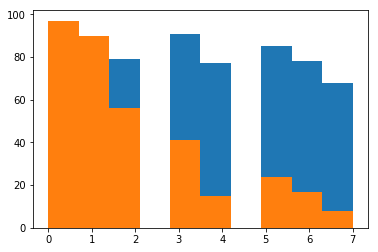

In [217]:
passing_lists_of_values_by_metric = []
non_passing_lists_of_values_by_metric = []
metrics = ['total_minutes_visited']

print("Summary of students who did pass vs. did NOT pass considering %s, respectively:" % metric)
#Summarize the data about minutes spent in the classroom:
total_minutes_passing_by_account = sum_grouped_items(grouped_passing_by_account, metric)
total_minutes_passing = list(total_minutes_passing_by_account.values())
describe_data(total_minutes_passing)
passing_lists_of_values_by_metric.append(list(total_minutes_passing))
print('\n')

total_minutes_non_passing_by_account = sum_grouped_items(grouped_non_passing_by_account, metric)
total_minutes_non_passing = list(total_minutes_non_passing_by_account.values())
describe_data(total_minutes_non_passing)
non_passing_lists_of_values_by_metric.append(total_minutes_non_passing)
print("---------------------------------------------------\n")

Summary of students who did pass vs. did NOT pass considering has_visited, respectively:
Sum:  2190
Mean: 3.38485316847
Median: 3.0
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


Sum:  663
Mean: 1.90517241379
Median: 1.0
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
---------------------------------------------------



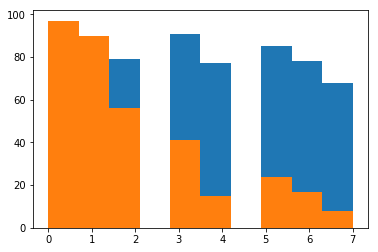

In [218]:
passing_lists_of_values_by_metric = []
non_passing_lists_of_values_by_metric = []
metrics = ['lessons_completed']

print("Summary of students who did pass vs. did NOT pass considering %s, respectively:" % metric)
#Summarize the data about minutes spent in the classroom:
total_minutes_passing_by_account = sum_grouped_items(grouped_passing_by_account, metric)
total_minutes_passing = list(total_minutes_passing_by_account.values())
describe_data(total_minutes_passing)
passing_lists_of_values_by_metric.append(list(total_minutes_passing))
print('\n')

total_minutes_non_passing_by_account = sum_grouped_items(grouped_non_passing_by_account, metric)
total_minutes_non_passing = list(total_minutes_non_passing_by_account.values())
describe_data(total_minutes_non_passing)
non_passing_lists_of_values_by_metric.append(total_minutes_non_passing)
print("---------------------------------------------------\n")

Summary of students who did pass vs. did NOT pass considering has_visited, respectively:
Sum:  2190
Mean: 3.38485316847
Median: 3.0
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


Sum:  663
Mean: 1.90517241379
Median: 1.0
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
---------------------------------------------------



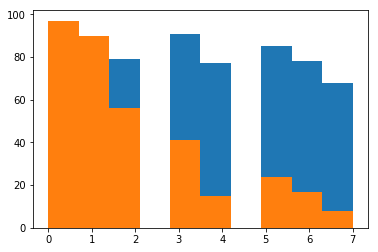

In [220]:
passing_lists_of_values_by_metric = []
non_passing_lists_of_values_by_metric = []
metrics = ['projects_completed']

print("Summary of students who did pass vs. did NOT pass considering %s, respectively:" % metric)
#Summarize the data about minutes spent in the classroom:
total_minutes_passing_by_account = sum_grouped_items(grouped_passing_by_account, metric)
total_minutes_passing = list(total_minutes_passing_by_account.values())
describe_data(total_minutes_passing)
passing_lists_of_values_by_metric.append(list(total_minutes_passing))
print('\n')

total_minutes_non_passing_by_account = sum_grouped_items(grouped_non_passing_by_account, metric)
total_minutes_non_passing = list(total_minutes_non_passing_by_account.values())
describe_data(total_minutes_non_passing)
non_passing_lists_of_values_by_metric.append(total_minutes_non_passing)
print("---------------------------------------------------\n")

In [ ]:
passing_lists_of_values_by_metric = []
non_passing_lists_of_values_by_metric = []
metrics = ['has_visited']

print("Summary of students who did pass vs. did NOT pass considering %s, respectively:" % metric)
#Summarize the data about minutes spent in the classroom:
total_minutes_passing_by_account = sum_grouped_items(grouped_passing_by_account, metric)
total_minutes_passing = list(total_minutes_passing_by_account.values())
describe_data(total_minutes_passing)
passing_lists_of_values_by_metric.append(list(total_minutes_passing))
print('\n')

total_minutes_non_passing_by_account = sum_grouped_items(grouped_non_passing_by_account, metric)
total_minutes_non_passing = list(total_minutes_non_passing_by_account.values())
describe_data(total_minutes_non_passing)
non_passing_lists_of_values_by_metric.append(total_minutes_non_passing)
print("---------------------------------------------------\n")

non-passing students:


ValueError: x must be 1D or 2D

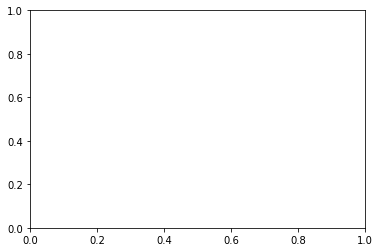

In [178]:
import seaborn as sns

print('non-passing students:')
non_passing_visits = sum_grouped_items(
    grouped_non_passing_by_account, 
    'has_visited'
)

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

## Making Histograms

In [ ]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
data = [1, 2, 1, 3, 3, 1, 4, 2]



## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.